<img src="newlogomioti.png" style="height: 100px">


&nbsp;
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning 2 (Unsupervised learning)</center>

# Challenge S2: Aprendizaje no supervisado: PCA

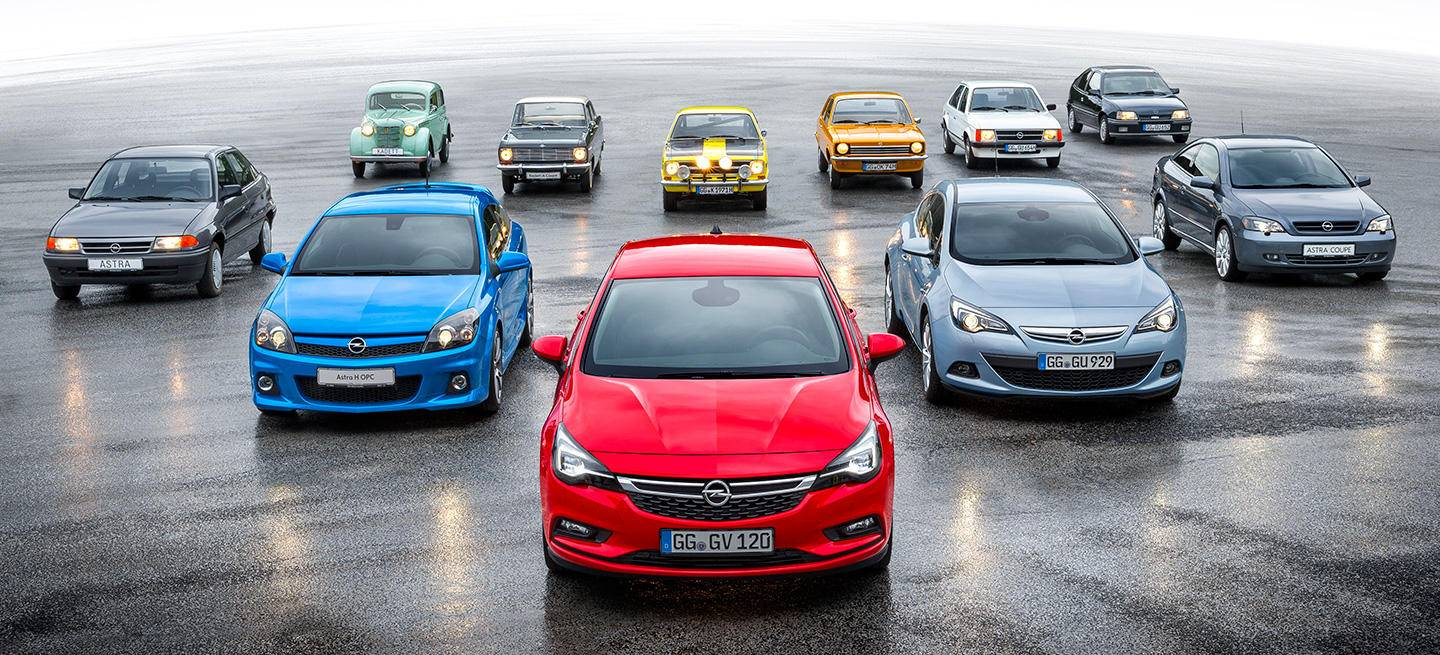

## Objetivos

El objetivo de este challenge es reducir la dimensión de un dataset que dispone de las características de distintos modelos de coches, en especial todoterrenos y turismos.

Para ello, utilizando la técnica de PCA realizaremos una reducción de dimensionalidad de las variables que nos indican las características (tamaño del motor, distancia entre ejes, longitud, anchura, ...) y posteriormente veremos si quedan identificados los todoterrenos y turismos.

### Importando y preparando dataset

In [1]:
#importamos las librerías
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Para visualizar de forma mejor los gráficos
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams.update({'font.size': 14})


In [2]:
coche=pd.read_csv('Car_sales.csv')
coche.sample(5)

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
97,Mercedes-Benz,SLK230,1.526,.,Passenger,41,2.3,185,94.5,67.5,157.3,2.975,14,27,8-Jun-15
32,Chrysler,LHS,13.462,17.325,Passenger,28.34,3.5,253,113,74.4,207.7,3.564,17,23,5-Aug-14
105,Nissan,Pathfinder,42.574,17.81,Car,29.299,3.3,170,106.3,71.7,182.6,3.947,21,19,25-Sep-15
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
103,Nissan,Maxima,79.853,15.125,Passenger,26.249,3,222,108.3,70.3,190.5,3.294,18.5,25,5-Jun-15


#### Podemos observar que en este dataset los nombres de las variables vienen con espacios, así como observamos que hay datos que vienen como '.' 

In [3]:
coche = coche.rename(columns={'Sales in thousands':'Sales_in_thousands','4-year resale value':'4_year_resale_value','Vehicle type':'Vehicle_type','Price in thousands':'Price_in_thousands','Engine size':'Engine_size','Curb weight':'Curb_weight','Fuel capacity':'Fuel_capacity','Fuel efficiency':'Fuel_efficiency','Latest Launch':'Latest_Launch'})
coche=coche.replace('.','NaN')

#### Vamos a ver ahora la información del dataset

In [4]:
coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   4_year_resale_value  157 non-null    object 
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   157 non-null    object 
 6   Engine_size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb_weight          157 non-null    object 
 12  Fuel_capacity        157 non-null    object 
 13  Fuel_efficiency      157 non-null    object 
 14  Latest_Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

#### Observamos que varias de nuestras columnas que deberían ser float son realmente object

In [5]:
coche[['4_year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']]=coche[['4_year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']].astype(float)

#### Vamos ahora a eliminar los duplicados y comprobar cuantos había

In [6]:
coche = coche.drop_duplicates()
coche.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   4_year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
dtypes: float64(11), object(4)
memory usage: 

#### En nuestro dataset no había datos duplicados, continuaremos ahora con los missing data

In [7]:
coche.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
4_year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
dtype: int64

#### Observamos que tenemos 36 missing data en 4_year_resale_value,2 en Price_in_thousands y Curb_weight, 3 en Fuel_efficiency y 1 en Engine_size,Horsepower, Wheelbase, Width,Length,y Fuel_capacity.
### Vamos ahora a cambiar los missing data por el valor de la mediana

In [8]:
coche = coche.fillna(coche.median())

Ya estamos casi a punto de aplicar PCA, antes algunas revisiones previas:
- Verificar que la escala de medida de las variables es similar y sino es así aplicar alguna técnica para conseguirlo.

In [9]:
#Sacamos un ejemplo de los registros del dataframe
coche.sample(5)

,Manufacturer,Model,Sales_in_thousands,4_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch
33,Chrysler,Town & Country,53.480,19.540,Car,22.799,3.0,177.5,107.0,70.55,187.9,3.342,17.2,24.0,13-Jul-15
87,Mercury,Cougar,26.529,13.890,Passenger,16.540,2.0,125.0,106.4,69.60,185.0,2.892,16.0,30.0,23-Feb-14
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.10,192.0,3.561,18.5,22.0,8-Sep-15
7,BMW,323i,19.747,14.180,Passenger,26.990,2.5,170.0,107.3,68.40,176.0,3.179,16.6,26.0,28-Jun-15
112,Oldsmobile,Bravada,20.017,19.925,Car,31.598,4.3,190.0,107.0,67.80,181.2,4.068,17.5,19.0,21-Sep-15


    - Observamos que las columnas numéricas tienen valores muy altos como Price_in_Thousands y otras más bajas como Fuel_efficiency. Es recomendable que normalicemos.
    - Lo haremos en apartados siguientes.


- Revisar la correlación entre las variables y son las que tienen relación las que aportaran una mayor reducción de la dimensión.

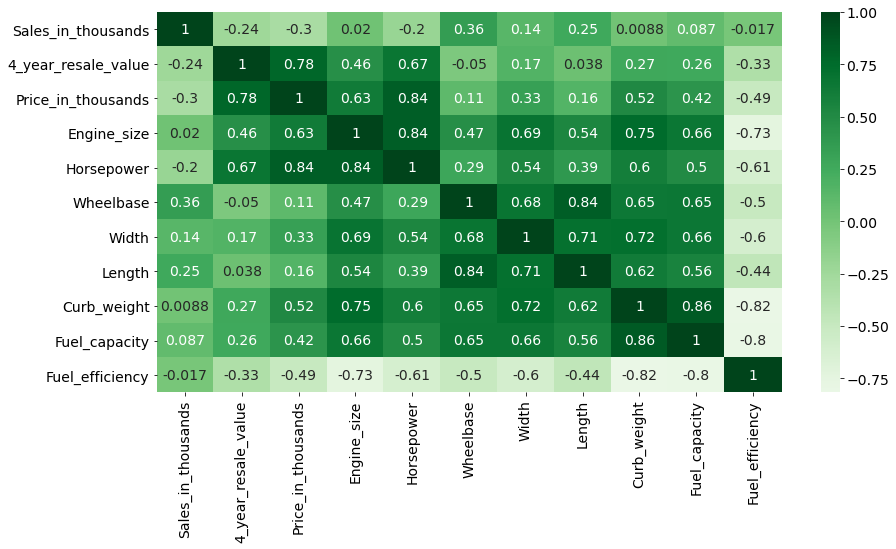

In [10]:
#Vemos la correlacion
ax = sns.heatmap(coche.corr(), annot=True, center=0, cmap="Greens")

#### Vamos a guardar la información de 2 observaciones, una de cada tipo de coche para luego comprobar en que grupo quedarían localizadas (por ejemplo la primera observación y la 84)

* Como es necesario que los datos estén normalizados, primero normalizamo y luego extraemos las observaciones.
* Lo haremos en el apartado 1.2.1

In [11]:
obs_car_passenger=coche.iloc[[0,84]]
obs_car_passenger

,Manufacturer,Model,Sales_in_thousands,4_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-Feb-14
84,Mitsubishi,Montero,11.337,19.125,Car,31.807,3.5,200.0,107.3,69.9,186.6,4.520,24.3,18.0,17-Jan-14


#### Ahora sí, vamos a crear el dataset con las variables a las que les vamos a realizar el PCA

In [12]:
cochepca= coche[['4_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower','Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity','Fuel_efficiency']]

## Comenzamos con el método PCA

### En primer lugar, seleccionando las componentes por el método del codo

La idea es buscar un codo en el gráfico entre las componentes y la varianza explicada, es decir, un punto a partir del cual el incremento de información explicada es casi la misma. El criterio es quedarse con un número de componentes que excluya los asociados a valores pequeños y aproximadamente del mismo tamaño.


In [13]:
#Recuerda si no lo has hecho antes que vamos a tener que normalizar las variables
Coche_normalizado = StandardScaler().fit_transform(cochepca)
Coche_normalizado

array([[-0.08085067, -0.4100527 , -1.21437647, ..., -1.18272557,
        -1.22870019,  0.98226418],
       [ 0.26558806,  0.07507023,  0.13438527, ...,  0.22328529,
        -0.19338056,  0.27268377],
       [ 0.10296391, -0.31872304,  0.13438527, ...,  0.14802047,
        -0.19338056,  0.50921057],
       ...,
       [-0.29571167,  0.1031933 , -0.63633573, ..., -0.18987052,
        -0.01219963,  0.27268377],
       [-0.29571167,  1.27733143, -0.73267585, ...,  0.35780113,
         0.14309832, -0.20036984],
       [-0.29571167,  0.60940854, -0.1546351 , ...,  0.35619975,
         0.81605607,  0.03615696]])

In [14]:
# Tomamos las muestras ya normalizadas del apartado 1.1.2.1. 
obs_car_passenger_norm=Coche_normalizado[[0,84],]
obs_car_passenger_norm
Coche_normalizado.shape

(157, 10)

In [15]:
# Borramos las observaciones tanto del normalizado. como del original
Coche_normalizado=np.delete(Coche_normalizado,(0,84),axis=0)
Coche_normalizado.shape

(155, 10)

In [16]:
# Como del data frame original
coche=coche.drop([0, 84])
coche.shape

(155, 15)

### Aplicamos PCA con 10 componentes inicialmente

y luego seleccionamos las mínimas necesarias. Primero aplicamos PCA:

In [17]:
#Función que nos permitirá hacer los distintos estudios de PCA durnate el challenge
def estudio_PCA(data_df,num_components):
    pca=PCA(n_components=num_components)
    pca.fit(data_df)
    transformada=pca.transform(data_df)
    print('\n Las dimensiones del nuevo dataset :',transformada.shape)
    
    #Visualizamos las componentes y la información que representan
    var_explicada = pca.explained_variance_ratio_
    print('\n Información que van aportando los componentes : \n',np.cumsum(var_explicada))
    plt.plot(np.cumsum(var_explicada))
    plt.grid(True)
    plt.xlabel('Número de componentes')
    plt.ylabel('Varianza acumulada');
    
    return pca,transformada


 Las dimensiones del nuevo dataset : (155, 10)

 Información que van aportando los componentes : 
 [0.59652511 0.80037408 0.86528622 0.90559714 0.93176758 0.95424603
 0.96966336 0.98360702 0.99390192 1.        ]


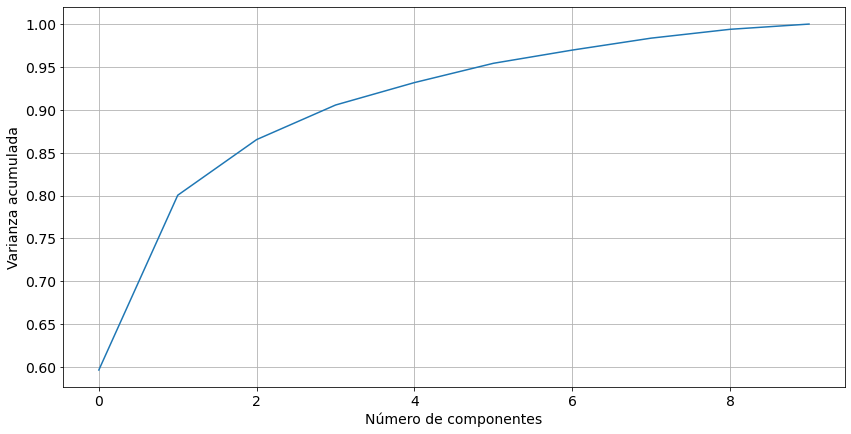

In [18]:
pca,transformada=estudio_PCA(Coche_normalizado,10)

y a continuación revisamos la varianza explicada, para ello dibujamos una gráfica entre componentes y varianza acumulada

In [19]:
#Ya lo hemos realizado en el punto anterior

##### ¿Con cuantas componentes superamos el 85%?  ¿ y esas componentes cuánto aportan realmente?

* Serían 3 componentes. Sería el 86% de la información contenida en esas variables.

##### Aplicamos el PCA con el número de componentes que nos ha parecido razonable y graficamos si es posible


 Las dimensiones del nuevo dataset : (155, 3)

 Información que van aportando los componentes : 
 [0.59652511 0.80037408 0.86528622]


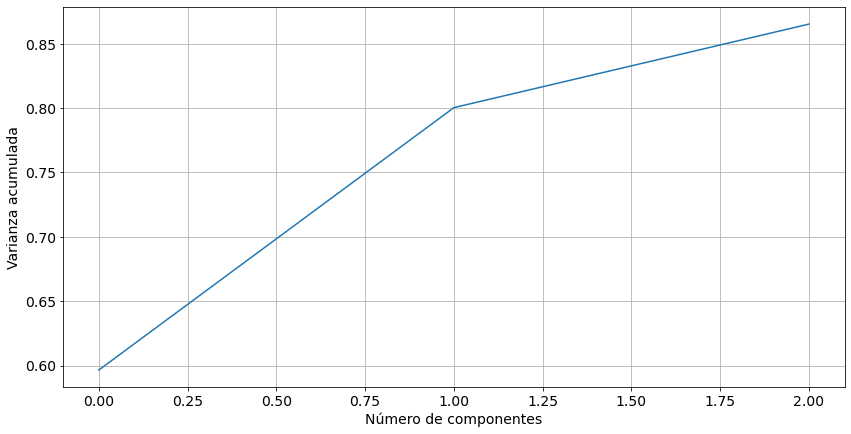

In [20]:
#Intentamos con 3 variables en el que ya recogemos más del 86% de la información
pca_2,transformada_2=estudio_PCA(Coche_normalizado,3)

##### Y como podemos observar hemos podido disminuir las dimensiones de 10 variables inicialmente a solo algunas componentes

####  Para realizar la gráfica y aunque PCA se usa en no supervisada (es decir sin etiquetas), para verlo mejor vamos a dibujar los coches diferenciándolos entre 'Passenger' y 'Car' tal y como vienen en 'Vehicles_types'

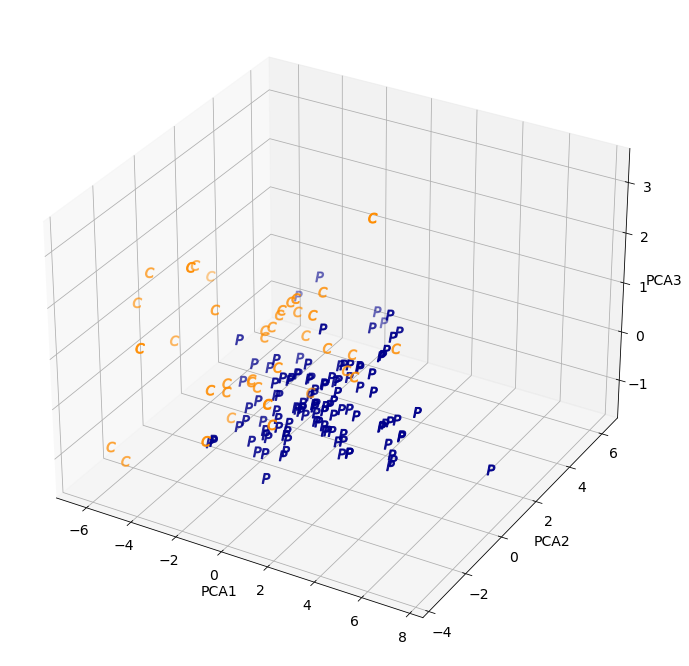

In [21]:
# #PDTE GRÁFICA 3D POR QUE HAY  3 VARIABLES.
# Scatter

# importamos las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure(figsize=(16,12))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos de prueba
x = transformada_2[coche['Vehicle_type']=='Car', 0]
y = transformada_2[coche['Vehicle_type']=='Car', 1]
z = transformada_2[coche['Vehicle_type']=='Car', 2]

# Datos adicionales
x2 = transformada_2[coche['Vehicle_type']=='Passenger', 0]
y2 = transformada_2[coche['Vehicle_type']=='Passenger', 1]
z2 = transformada_2[coche['Vehicle_type']=='Passenger', 2]

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='darkorange', marker='$C$',s=100)
ax1.scatter(x2, y2, z2, c ='darkblue', marker='$P$', s=100)

ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_zlabel('PCA3')

# Mostramos el gráfico
plt.show()

### ¿Consigues ver los grupos separados en la gráfica?

* Aunque tienen una zona donde se solapan ciertos puntos de Car y Passenger se ditingen bien los grupos

## Predeterminando la cantidad de información de las componentes

####  En segundo lugar, seleccionando las componentes que me aportan el 80% de la información


 Las dimensiones del nuevo dataset : (155, 2)

 Información que van aportando los componentes : 
 [0.59652511 0.80037408]


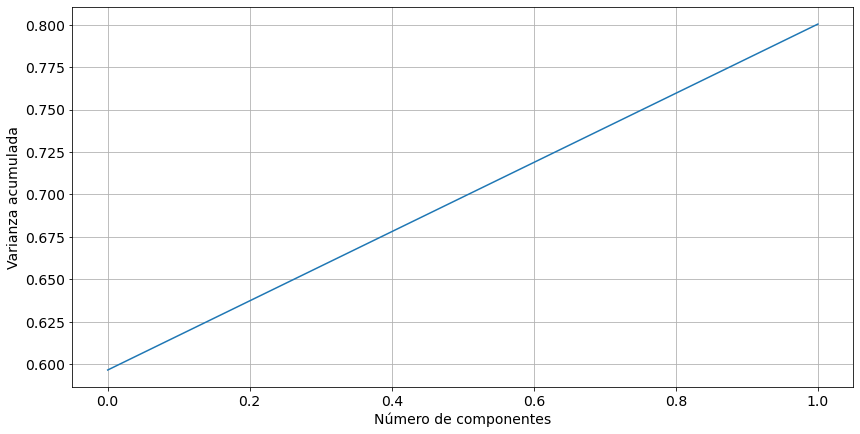

In [22]:
#n_componentes =0.80
pca_3,transformada_3=estudio_PCA(Coche_normalizado,0.80);

#### ¿Cuantas componentes principales obtenemos en este caso? ¿Cuanta varianza acumulada proporcionan? Grafica los resultados

* Se obtienen 2 componentes. Proporcionan una varianza acumulada del 80,04% de la información.

##### Podemos comprobar que en efecto su porcentaje supera el 80%

* Si. En concreto es el 80,04%

#### ¿Es posible con esta gráfica hacer una gran distinción entre car y passenger?

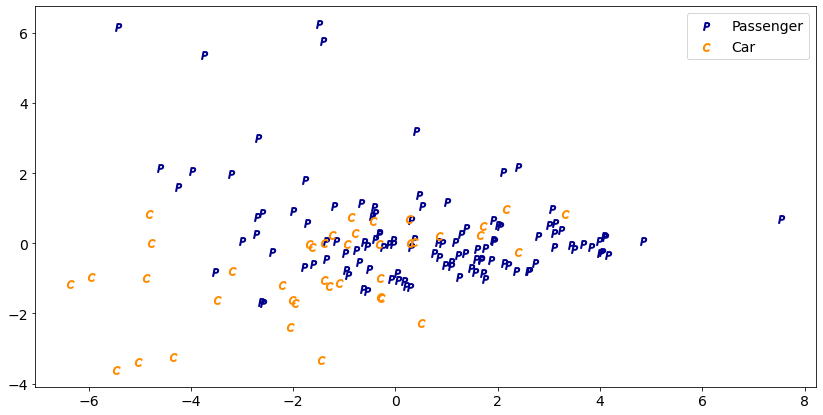

In [23]:
#Utilizar la misma gráfica que diferecnia las formas de maligno y benigno
vh_types=coche['Vehicle_type'].unique()
for vh_type, col,mark in zip(vh_types,('darkblue', 'darkorange'),('$P$','$C$')):
#     print(vh_type)
    plt.scatter(transformada_3[coche['Vehicle_type']==vh_type, 0],transformada_3[coche['Vehicle_type']==vh_type, 1],s=60,label=vh_type,c=col,marker = mark)
plt.legend()

* En la gráfica hay una zona donde se entremezclan los Car y los Passenger. Por lo que no se diferencia claramente un grupo de otro

## ¿Distinguimos el grupo de las dos observaciones test?

#### Para ello accedemos a la página de scikit.sklearn para ver como estandariza StandardScaler y nos fijamos que la forma de estandarizar es: 
###### z = (x - u) / s siendo u la media y s la desv.tipica.

In [24]:
#Ya sacamos las muestras normalizadas en el aparatdo 1.2.1

#### De esta manera hemos estandarizado los datos al igual que si hubiesen estado en el dataset original

In [25]:
obs_car_passenger_norm

array([[-0.08085067, -0.4100527 , -1.21437647, -0.81457678, -0.82766074,
        -1.12128671, -1.11997098, -1.18272557, -1.22870019,  0.98226418],
       [ 0.19166799,  0.31460847,  0.42340564,  0.25034769, -0.02424427,
        -0.36330172, -0.05598185,  1.82946854,  1.64431178, -1.38300386]])

#### Ahora ya le hemos aplicado las PCA a ambas pruebas y proseguimos con la gráfica

In [26]:
obs_car_passenger_norm_trans=pca_3.transform(obs_car_passenger_norm)

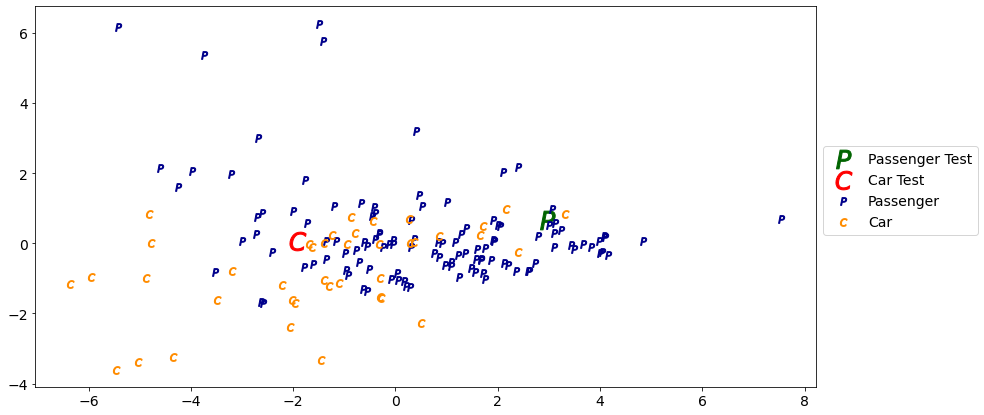

In [27]:
#Pintamos los test.

vh_types=coche['Vehicle_type'].unique()
for vh_type, col,mark in zip(vh_types,('darkgreen', 'red'),('$P$','$C$')):
#     print(vh_type)
    plt.scatter(obs_car_passenger_norm_trans[obs_car_passenger['Vehicle_type']==vh_type, 0],obs_car_passenger_norm_trans[obs_car_passenger['Vehicle_type']==vh_type, 1],s=350,label=vh_type+' '+'Test',c=col,marker = mark)

#Pintamos el resto de observaciones.

vh_types=coche['Vehicle_type'].unique()
for vh_type, col,mark in zip(vh_types,('darkblue', 'darkorange'),('$P$','$C$')):
#     print(vh_type)
    plt.scatter(transformada_3[coche['Vehicle_type']==vh_type, 0],transformada_3[coche['Vehicle_type']==vh_type, 1],s=60,label=vh_type,c=col,marker = mark)
    
plt.legend(bbox_to_anchor=(1, 0.65))

#### ¿Podríamos clasificar a nuestras 2 observaciones de test entre los 2 tipos de vehículos?

* Sucede como con el resto. No se diferencian de forma muy nítida ya que se situan en el área donde se entremezclan Car y Passenger. Habría que subir en este caso el número de componentes

## ¿Qué relación tienen las componentes con las variables?

#### Utiliza un indicador que nos permita identificar las relaciones entre variables y componentes

In [28]:
#LO HEMOS UTILIZADO WORKSHEET
pca_3.components_.shape

(2, 10)

In [29]:
pca_3.components_

array([[-0.19536349, -0.27368922, -0.36483547, -0.33158828, -0.28090687,
        -0.33246709, -0.28708093, -0.36852239, -0.34461921,  0.34269806],
       [ 0.53282603,  0.46553225,  0.10461179,  0.32518228, -0.42450367,
        -0.21120373, -0.3595462 , -0.10229734, -0.13467054,  0.00206178]])

#### ¿Puedes visualizar estas relaciones en una gráfica?

* Gráfica 1: Muestra como fluctuan los coeficientes de cada variable para cada uno de los componentes PCA

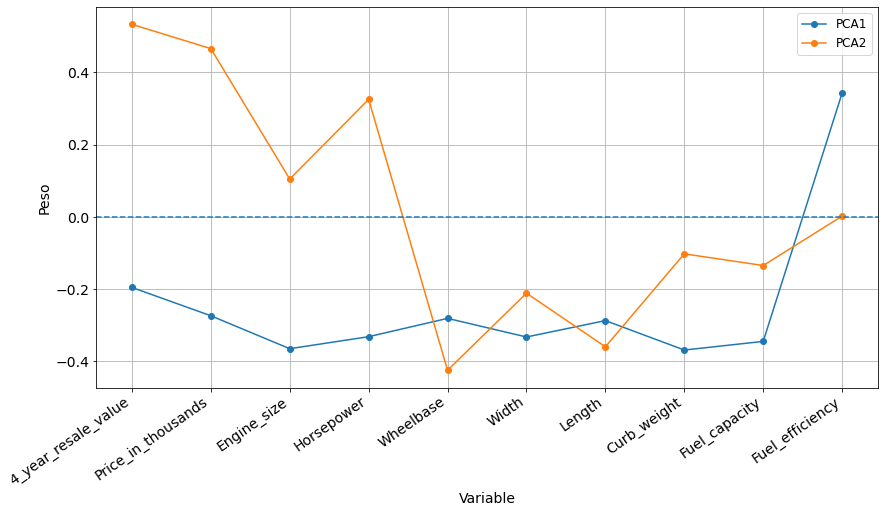

In [30]:
#Gráfica que muestra como fluctuan los coeficnets de cada variable para cada uno de los componentes PCA
plt.plot(cochepca.columns, pca_3.components_[0], marker='o', label='PCA1')
plt.plot(cochepca.columns, pca_3.components_[1], marker='o', label='PCA2')
plt.grid(True)
plt.xlabel('Variable')
plt.ylabel('Peso')
plt.axhline(y=0,ls='--')
plt.xticks(cochepca.columns, rotation=35, ha='right')
plt.legend(prop=dict(size=12))
plt.show()

* Gráfica 2: Muestra como influyen cada variable en cada componente PCA

In [31]:
#Transponemos la matriz de componentes para que cada columna sea una PCA.
pca_3.components_.T

array([[-0.19536349,  0.53282603],
       [-0.27368922,  0.46553225],
       [-0.36483547,  0.10461179],
       [-0.33158828,  0.32518228],
       [-0.28090687, -0.42450367],
       [-0.33246709, -0.21120373],
       [-0.28708093, -0.3595462 ],
       [-0.36852239, -0.10229734],
       [-0.34461921, -0.13467054],
       [ 0.34269806,  0.00206178]])

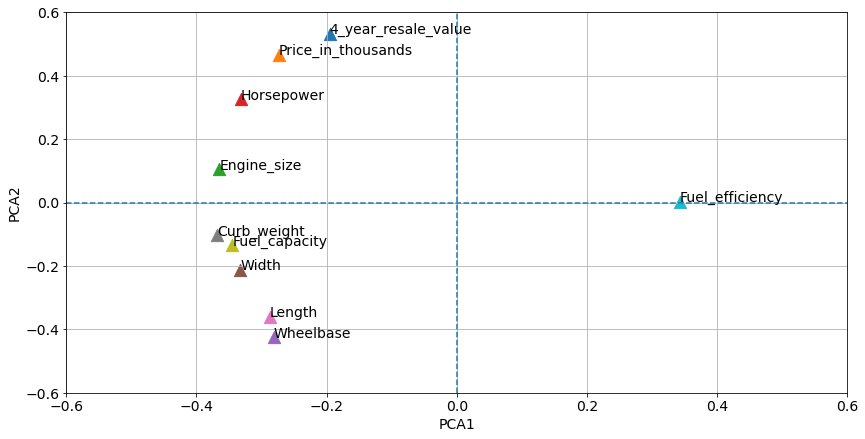

In [32]:
# Gráfica que visualiza como influye cada variable en cada componente PCA

PCAs=(pca_3.components_.T)
nombre_variables=cochepca.columns

for index, var in enumerate((PCAs)):
    plt.scatter(var[0], var[1], marker='^',s=150)
    plt.text(x=var[0],y=var[1], s=nombre_variables[index] , ha='left', va='baseline' ,fontdict=dict(fontsize=14))

plt.grid(True)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xlim((-0.6,0.6))
plt.ylim((-0.6,0.6))
plt.axhline(y=0,ls='--')
plt.axvline(x=0,ls='--')
# plt.legend(prop=dict(size=12))
        
plt.show()


#### ¿Qué variables aportan mas a cada componente?

* Para el componente PCA1: Tiene una influencia de forma positiva Fuel_efficiency. El resto de ellas tienen una influencia negativa que se situa entre -0,2 y -0,4
* Para el componente PCA2: Se distribuyen de manera más o menos uniforme las que tienen influencia negativa y positiva. Teniendo la mayor influencia positiva '4_year_resale_value' y la mayor influencia negativa 'Wheelbase'. A destacar que la variable Fuel_efficiency apenas tiene influencia ya que su valor esta muy próximo a cero.

## Como conclusiones y reflexiones:
* ¿Se te ocurren aplicaciones concretas de PCA en tu entorno?


    - Como aplicaciones concretas yo pienso que cada vez esta extendido por muchos aámbitos, cada vez se recogen más datos, dtanto desde hábtios de consumos, como médicos, como de operaciones financieras.
    - Algún caso en concreto que se me ocurre la deteción médica de enfermedades, por el tratamiento de imagenes. Una imagen tiene muchas variables, tanto como pixeles, por lo que la información importante médica para un dignostico de imagen en el que se evaluan manchas, sombras, formas es suceptible de ser reducido.
    - También es posible que en el caso de relacionado con la deteccción de ciertos problemas genéticos al analizar secuencias de genes.
    - Claramente en el tema de calculo del riesgo en inversiones y prestamos.


* ¿En qué situaciones deberíamos ser cuidadosos antes de aplicar PCA?

       - Deberiamos ser cuidadosos revisando las magnitudes de cada variable y tal vez ser cuidados so y hacer standarizaciones de la información
       - Deberiamos ser cuidadosos a la hora de observar que no hya perdida de información relevante.